#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={'0':-1, '1':1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

#### Plotando classificador

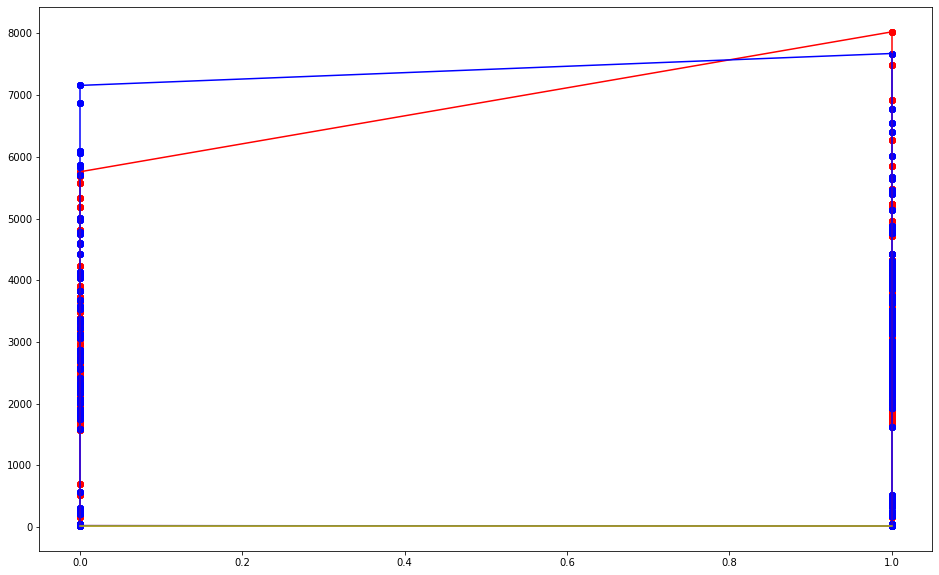

In [6]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [7]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.436170,1.000,0.436170,0.447917
1,0.410526,1.000,0.410526,0.416667
2,0.419355,0.975,0.419355,0.427083
3,0.562500,1.000,0.562500,0.562500
4,0.414894,1.000,0.414894,0.427083


#### Resultados do teste

In [9]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.453202,0.978723,0.453202,0.456731


#### Criando instância do classificador baseado em envoltória convexa para as features (0, 2)

In [10]:
CHclf02 = ConvexHullClassifier(points, coordinate1=0, coordinate2=2, nFolds=5)
CHresults02 = CHclf02.run()

#### Plotando classificador

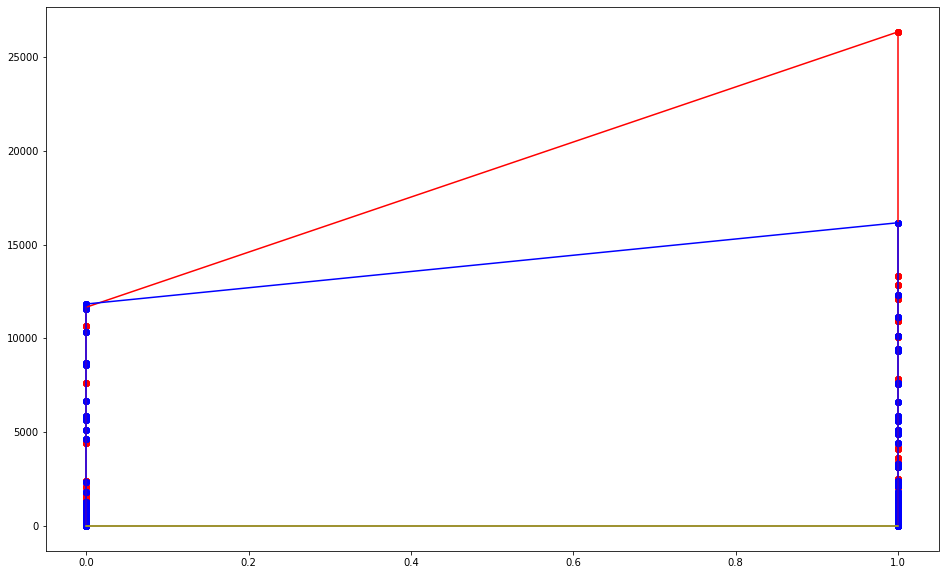

In [11]:
CHclf02.plotHulls()

#### Verificando separabilidade linear dos pontos

In [12]:
CHclf02.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [13]:
CHresults02["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.447917,1.0,0.447917,0.447917
1,0.427083,1.0,0.427083,0.427083
2,0.458333,1.0,0.458333,0.458333
3,0.447917,1.0,0.447917,0.447917
4,0.489583,1.0,0.489583,0.489583


#### Resultados do teste

In [14]:
CHresults02["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.427885,1.0,0.427885,0.427885


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [15]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

#### Plotando classificador

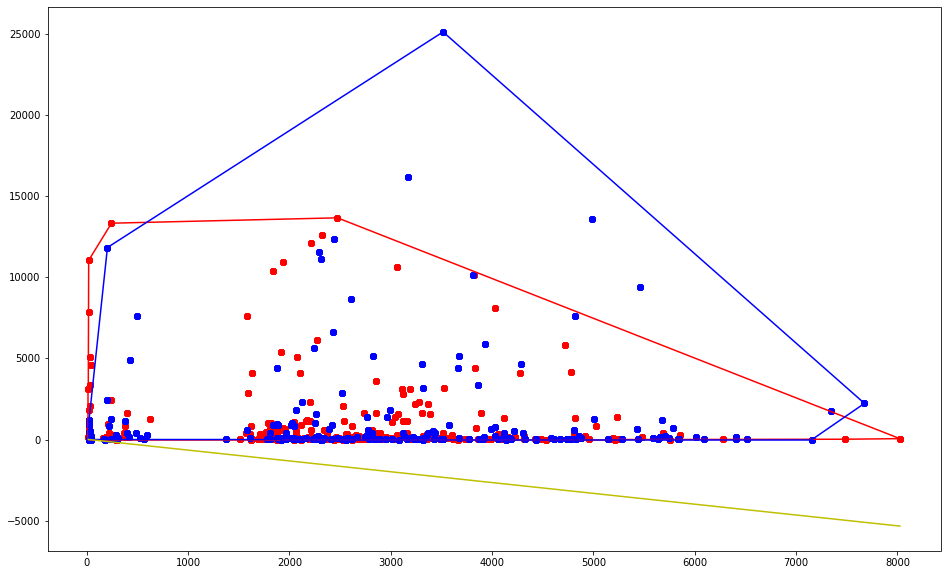

In [16]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [17]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [18]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.489583,1.0,0.489583,0.489583
1,0.354167,1.0,0.354167,0.354167
2,0.364583,1.0,0.364583,0.364583
3,0.437500,1.0,0.437500,0.437500
4,0.468750,1.0,0.468750,0.468750


#### Resultados do teste

In [19]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.490385,1.0,0.490385,0.490385


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [20]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [21]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.727273,0.558140,0.727273,0.708333
1,0.678571,0.487179,0.678571,0.697917
2,0.769231,0.476190,0.769231,0.708333
3,0.700000,0.477273,0.700000,0.666667
4,0.629630,0.425000,0.629630,0.656250


#### Resultados do teste

In [22]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.714286,0.412371,0.714286,0.649038
